# A demo example for running the VAE

#### Load the required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, njit
import pickle
from VAE import VAE

#### Load the MNIST data set and set it up for training

In [2]:
from keras.datasets import mnist

(trainX, trainy), (testX, testy) = mnist.load_data()

Using TensorFlow backend.


In [3]:
# change dimensions, reformat to start training
# for any data, convert each data point to vectors
Xdim1, Xdim2 = trainX[0].shape[0], trainX[0].shape[1]
trainX = trainX.reshape(trainX.shape[0], Xdim1*Xdim2)

#### Start the training, better to save the weights and biases after some time

In [5]:
# train
# set nBatch to be high for better results, 
# like nBatch = 60000 being equivalent to 100 epochs
W, b, loss = VAE.train_AEVB(trainX, trainy, nBatch = 1, M = 1, L = 1, std_const = 255, \
                            dm = 500, dz = 5, alpha = 0.005, beta1 = 0.9, beta2 = 0.999, \
                            eps_stable = 1e-8, W = "", b = "", nP = 0)

In [29]:
# for the sake of convenience, loading up previously saved parameters
def get_para(filename):
    """read parameters from file"""
    file = open(filename, 'rb')
    dict = pickle.load(file)
    return dict

filename = "2020_04_30_Final_Model_dz5_100k_parameter.txt"
para = get_para(filename)

W = para['W']
b = para['b']

In [96]:
# train using previously saved parameters, make sure the previous settings were the same!!
W_new, b_new, loss_new = VAE.train_AEVB(trainX, trainy, nBatch = 1, M = 1, L = 1, std_const = 255, \
                                        dm = 500, dz = 5, alpha = 0.005, beta1 = 0.9, beta2 = 0.999, \
                                        eps_stable = 1e-8, W = W, b = b, nP = 0)

#### Look at reconstruction

In [7]:
def plot_samples(trainX, trainy, W, b, std_const = 255):
    """
    Randomly sample 9 figures from training data, reconstruct based on 
    user specified model parameters and plot for comparison.
    
    Input parameters：
    ----------
    trainX: array_like
            Training dataset inputs.
            Dimension: number of sample by dim1 by dim2 ...
    trainy: array_like
            Training dataset labels. 
            This variable is not currently used in the function. For further developments.
    W: list
            List of model weights parameters, same format as train_AEVB function output variable W.
    b: list
            List of model bias parameters, same format as train_AEVB function output variable b.
    std_const: integer, optional
            Normlizing constant to reconstruct data.
            Currently default at 255 which is usually used for black and white image data.            
    
    Output:
    ----------
    9 random sampled figures from training data and the model-reconstructed ones for comparison
    """

    dx = trainX.shape[1]
    M = 9
    L = 1
    dz, dm = W[1].shape[0], W[1].shape[1]
    Spec = [1, M, L, 255, dx, dm, dz, 0.005, 0]

    batchX, batchy = VAE.get_Batch_nb(M, trainX, trainy)
    X = batchX / std_const
    eps = np.zeros((L, dz))

    y, q_h1, p_h2, q_mu, q_s2, z, loss = VAE.batch_forward_vec_nb2(Spec, X, W, b, eps)
    
    
    batchX = batchX.reshape(M, 28, 28)
    
    for i in range(M):
        # define subplot
        plt.subplot(330 + 1 + i)
        # plot raw pixel data
        plt.imshow(batchX[i], cmap=plt.get_cmap('gray'))
    # show the figure
    plt.show()
    
    for i in range(M):
        # define subplot
        plt.subplot(330 + 1 + i)
        # plot raw pixel data
        plt.imshow(y[i,L-1,].reshape(Xdim1, Xdim2) * std_const, cmap=plt.get_cmap('gray'))
    # show the figure
    plt.show()

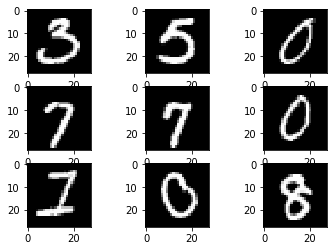

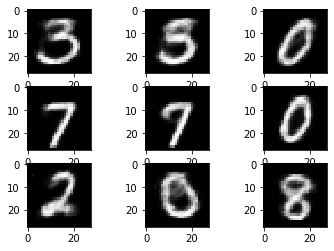

In [30]:
# take some random samples and reconstruct
plot_samples(trainX, trainy, W, b)

#### Generate some fake images!

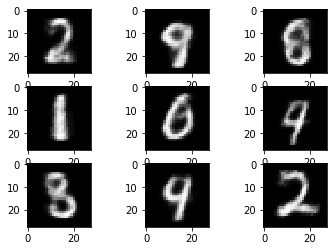

In [31]:
### generate some noise!

# parameters setup
dx = trainX.shape[1]
M = 9
L = 1
dz = 5
dm = 500
std_const = 255

# sample from the prior distribution of z, p(z) ~ N(0,I), 9 points
z_fake = 1.5*np.random.randn(M,L,dz) # 1.5* to inflate, some additional variance to see variety
y_fake, _ = VAE.decoder_forward_vec_nb1(W = W, b = b, z = z_fake)

# plot the fake images
for i in range(M):
        # define subplot
        plt.subplot(330 + 1 + i)
        # plot raw pixel data
        plt.imshow(y_fake[i,L-1,].reshape(Xdim1, Xdim2) * std_const, cmap=plt.get_cmap('gray'))
# show the figure
plt.show()